In [30]:
# compare scaling methods for mlp inputs on regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std
 
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
    # generate dataset
    X, y = make_regression(n_samples=1000,n_features=20,noise=0.1,random_state=1)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train,:],X[n_train:,:]
    trainy, testy = y[:n_train],y[n_train:]
    # scale inputs
    if input_scaler is not None:
        # fit scaler
        input_scaler.fit(trainX)
        # transform training dataset
        trainX=input_scaler.transform(trainX)
        # transform test dataset
        testX=input_scaler.transform(testX)
    if output_scaler is not None:
    # reshape 1d arrays to 2d arrays
        trainy=trainy.reshape(len(trainy),1)
        testy=testy.reshape(len(testy),1)
        # fit scaler on training dataset
        output_scaler.fit(trainy)
        # transform training dataset
        trainy=output_scaler.transform(trainy)
        # transform test dataset
        testy=output_scaler.transform(testy)
    return trainX, trainy, testX, testy
 
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model=Sequential()
    model.add(Dense(25,input_dim=20,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # compile model
    model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01,momentum=0.8))
    # fit model
    model.fit(trainX,trainy,epochs=100,verbose=0)
    # evaluate the model
    test_mse=model.evaluate(testX,testy,verbose=0)
    return test_mse
 
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
    # get dataset
    trainX,trainy,testX,testy=get_dataset(input_scaler,output_scaler)
    # repeated evaluation of model
    results = list()
    for _ in range(n_repeats):
        results.append(evaluate_model(trainX,trainy,testX,testy))
    return results

In [31]:
# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())

In [32]:
# summarize results
print('Unscaled: %.3f(%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f(%.3f)' % (mean(results_normalized_inputs),std(results_normalized_inputs)))
print('Standardized: %.3f(%.3f)' % 
      (mean(results_standardized_inputs),std(results_standardized_inputs)))

Unscaled: 0.010(0.002)
Normalized: 0.000(0.000)
Standardized: 0.010(0.002)


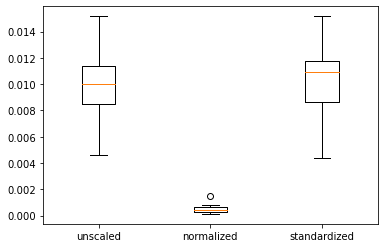

In [33]:
# plot results
results = [results_unscaled_inputs,results_normalized_inputs,results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()